In [2]:
import numpy as np
import importlib
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from scipy.special import erfc

In [5]:
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
print(avR(10**3,50))
print(np.sqrt(2*10**3/50/3))
print(1/avR(10**3,50))

2.6696353742394026
3.6514837167011076
0.3745829897406521


In [40]:
NAMEs = ['N5_L100','N10_L200','N25_L500','N25_L500_b','N50']
N = [5,10,25,25,50]
L = [100,200,500,500,1000]
NAMEs = ['N25_L500','N25_L500_b','N50']
N = [25,25,50]
L = [500,500,1000]

In [41]:
ISFs = list()
for name in NAMEs:
    ISFs.append(Data_Treatement(media+name+'.hdf',data_type='ISF'))
for isf in ISFs:
    isf.average(log_scale=True)

0.001
0.001
0.001


In [42]:
for isf in ISFs:
    print(isf.attributes)

{'ell_tot': 500, 'Energy': -15, 'kdiff': 0.001, 'seed': 810497, 'Nlinker': 25, 'dimension': 3, 'step_tot': 500000, 'check_steps': 10000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'cluster': (<class 'Cluster.Cluster'>, (3.0,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.5, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}", 'MSD_args': {'NRG': True, 'cluster': True, 'MSD': False, 'ISF': True, 'PCF': False, 'PCF_L': False}, 'ISF_arg': 1.5}
{'ell_tot': 500, 'Energy': -15, 'kdiff': 0.001, 'seed': 471043, 'Nlinker': 25, 'dimension': 3, 'step_tot': 500000, 'check_steps': 10000, 'coarse_grained_step': 10, 'cluster_max_distance': "{'cluster': (<class 'Cluster.Cluster'>, (3.6,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.2777777777777778, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'E

In [38]:
avR = lambda L,N : 2*(np.exp(-1.5/(L/N)) * np.sqrt(L/N*6/np.pi)*(3+2*L/N) - 9*erfc(np.sqrt(3/2/(L/N))))/(9*L/N) #average distance between equilibrated nodes
print(avR(1000,50))
print(1/(avR(1000,50)))
print(1/(np.sqrt(2*500/25/3)))
for isf in ISFs:
    print(isf.attributes['cluster_max_distance'])
    

2.6696353742394026
0.3745829897406521
0.27386127875258304
{'cluster': (<class 'Cluster.Cluster'>, (3.0,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.5, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}
{'cluster': (<class 'Cluster.Cluster'>, (3.6,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.2777777777777778, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}
{'cluster': (<class 'Cluster.Cluster'>, (3.0,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.5, 10)), 'PCF': (<class 'PCF.PCF'>, (15.811388300841896, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (1000, 30)), 'NRG': (<class 'Energy.NRG'>, ())}


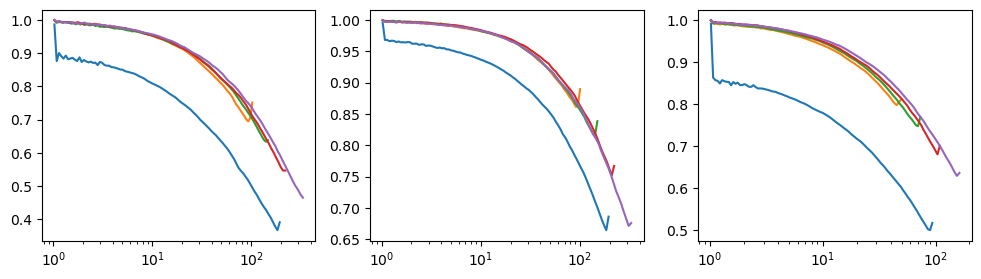

In [25]:
fig,ax = plt.subplots(figsize=(4*len(ISFs),3),ncols=len(ISFs))
colors = ['red','black']
n=0
imax=5
for isf in ISFs:
    for time,data in zip(isf.binned_time[:imax],isf.average_data[:imax]):
        ax[n].plot(time,data)#,color=colors[n])    
    ax[n].set_xscale('log')
    n+=1